In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('C:\\Users\\sambh\\Downloads\\startup_funding.csv')

In [3]:
# Create SQLite DB
conn = sqlite3.connect('startup_funding.db')
df.to_sql('funding_data', conn, if_exists='replace', index=False)

3044

In [4]:
pd.read_sql('SELECT * FROM funding_data LIMIT 5', conn)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",None
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",None
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",None
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",None
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",None


# Extract data from SQL in Juypter

In [5]:
# Connect and extract data
query = "SELECT * FROM funding_data"
df = pd.read_sql(query, conn)
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",None
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",None
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",None
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",None
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",None


# Data cleaning and processing

In [6]:
print(df.columns)

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')


In [7]:
df.rename(columns={
    'Date dd/mm/yyyy': 'Date',
}, inplace=True)


In [8]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


C:\Users\sambh\AppData\Local\Temp\ipykernel_4380\3462756209.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [9]:
df.head(10)

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Year,Month
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",None,2020,9
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",None,2020,1
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",None,2020,9
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",None,2020,2
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",None,2020,2
5,6,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",None,2020,1
6,7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",None,2020,10
7,8,2019-12-12,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",None,2019,12
8,9,2019-06-12,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",None,2019,6
9,10,2019-03-12,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",None,2019,3


In [10]:
df.rename(columns={
    'City Location': 'Location',
}, inplace=True)


In [11]:

print(df.head(50))


    Sr No       Date                  Startup Name  \
0       1 2020-09-01                        BYJU’S   
1       2 2020-01-13                        Shuttl   
2       3 2020-09-01                     Mamaearth   
3       4 2020-02-01  https://www.wealthbucket.in/   
4       5 2020-02-01                        Fashor   
5       6 2020-01-13                         Pando   
6       7 2020-10-01                        Zomato   
7       8 2019-12-12                        Ecozen   
8       9 2019-06-12                      CarDekho   
9      10 2019-03-12                  Dhruva Space   
10     11 2019-12-13                        Rivigo   
11     12 2019-12-17                    Healthians   
12     13 2019-12-16                       Licious   
13     14 2019-12-16                        InCred   
14     15 2019-12-14                         Trell   
15     16 2019-11-12                    Rein Games   
16     17 2019-12-20                  Lenskart.com   
17     18 2019-11-13        

In [12]:

df['Year'] = df['Year'].astype(int)

In [13]:

df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')


# Exploratory Data Analysis

In [14]:
funding_by_year = df.groupby('Year')['Amount in USD'].sum().reset_index

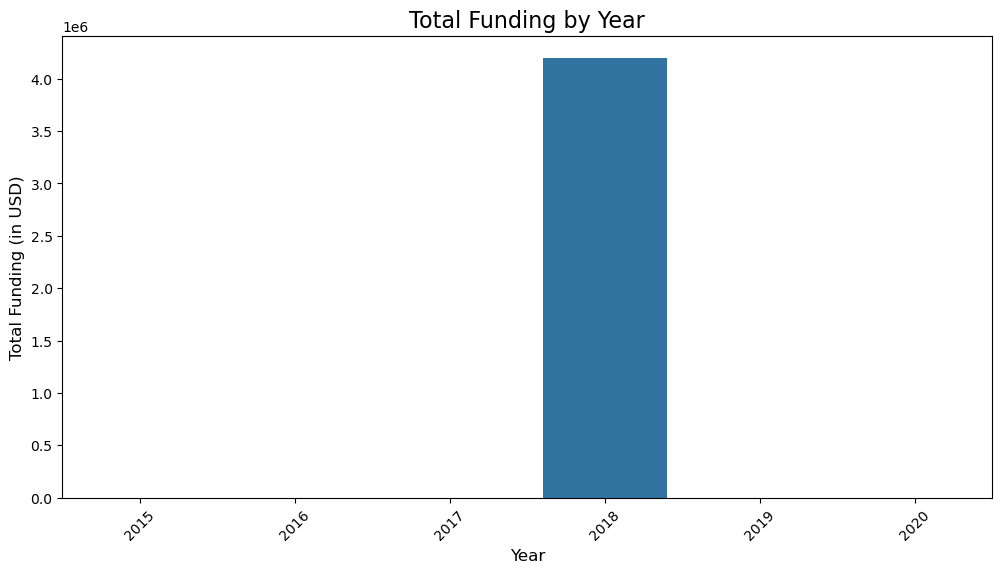

In [15]:
funding_by_year = df.groupby('Year')['Amount in USD'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Amount in USD', data=funding_by_year, estimator=sum)
plt.title('Total Funding by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Funding (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [16]:
missing_investors = df['Investors Name'].isna().sum()
print(f"Number of missing values in 'Investors' column: {missing_investors}")



Number of missing values in 'Investors' column: 24


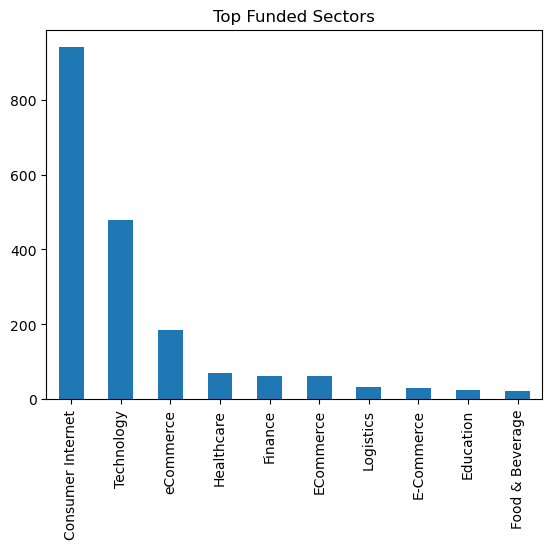

In [17]:
df['Industry Vertical'].value_counts().head(10).plot(kind='bar', title='Top Funded Sectors')
plt.show()

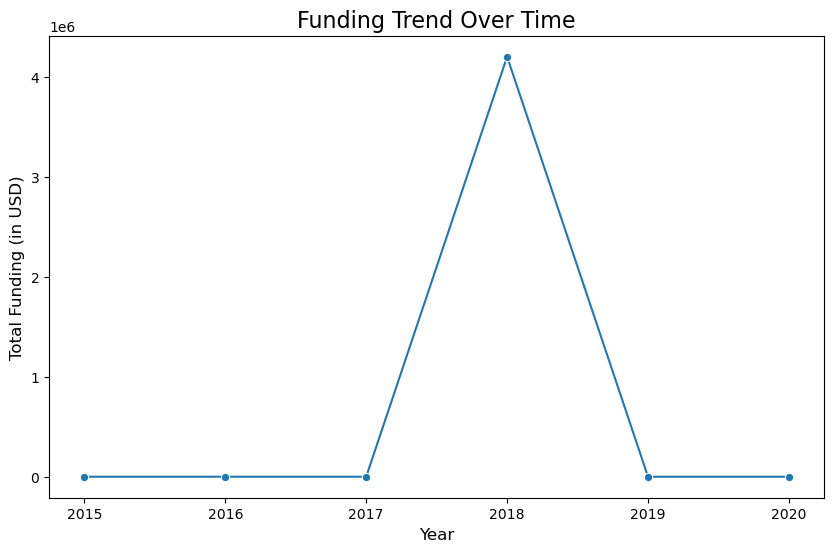

In [18]:
yearly_funding = df.groupby('Year')['Amount in USD'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_funding.index, y=yearly_funding.values, marker='o')
plt.title('Funding Trend Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Funding (in USD)', fontsize=12)
plt.show()


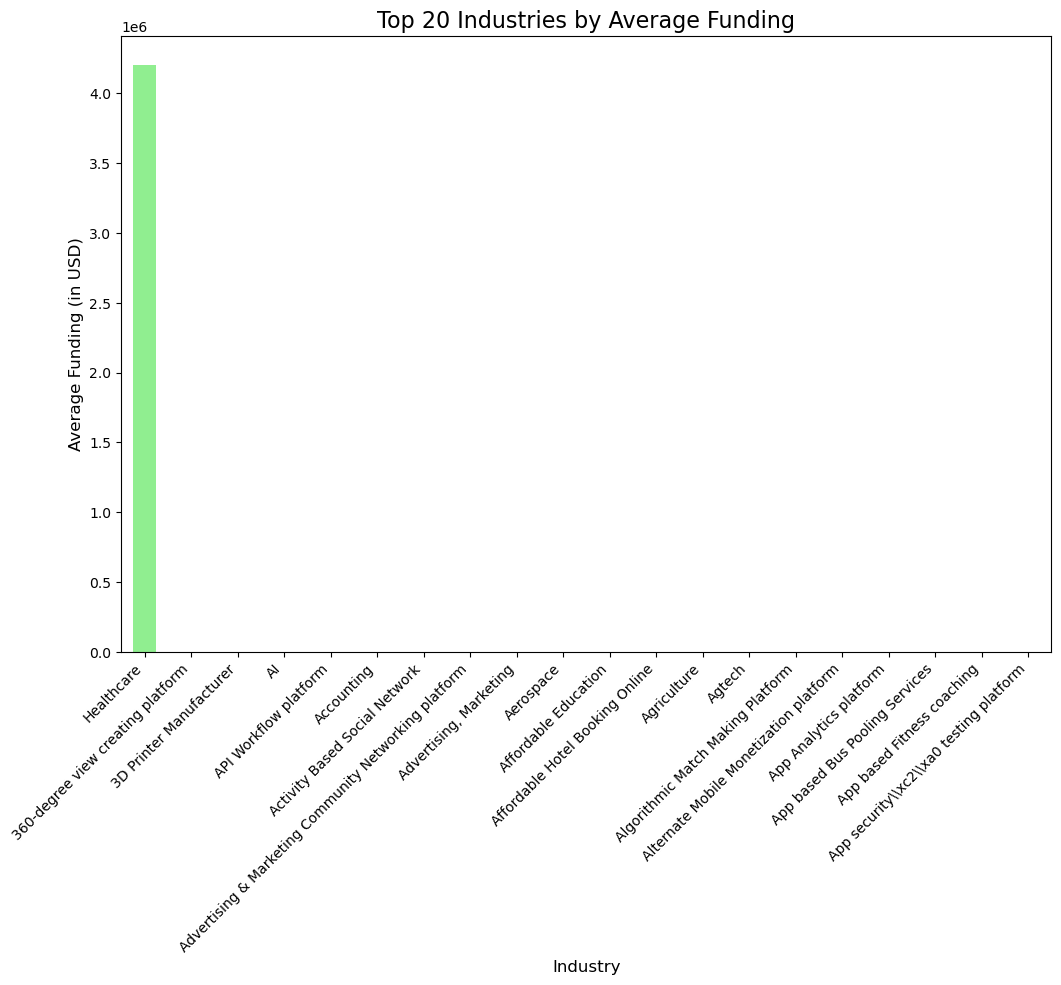

In [19]:
industry_avg_funding = df.groupby('Industry Vertical')['Amount in USD'].mean().sort_values(ascending=False)
top_50_industries = industry_avg_funding.head(20)
plt.figure(figsize=(12, 8))
top_50_industries.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Industries by Average Funding', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Funding (in USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()



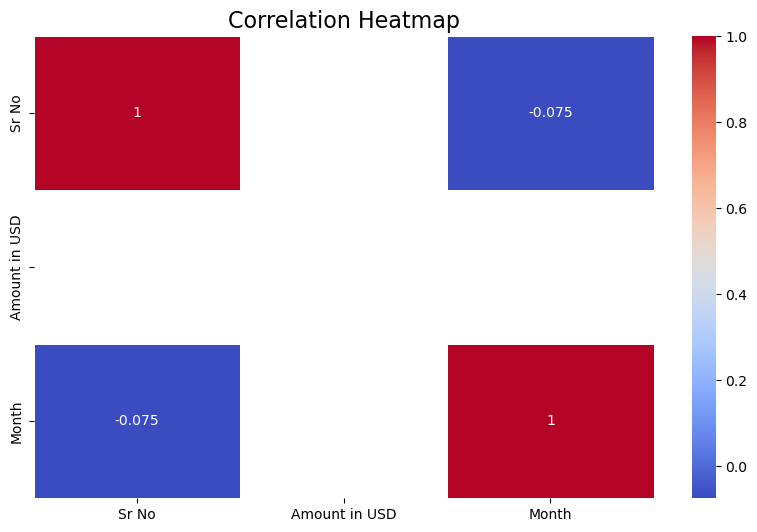

In [20]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


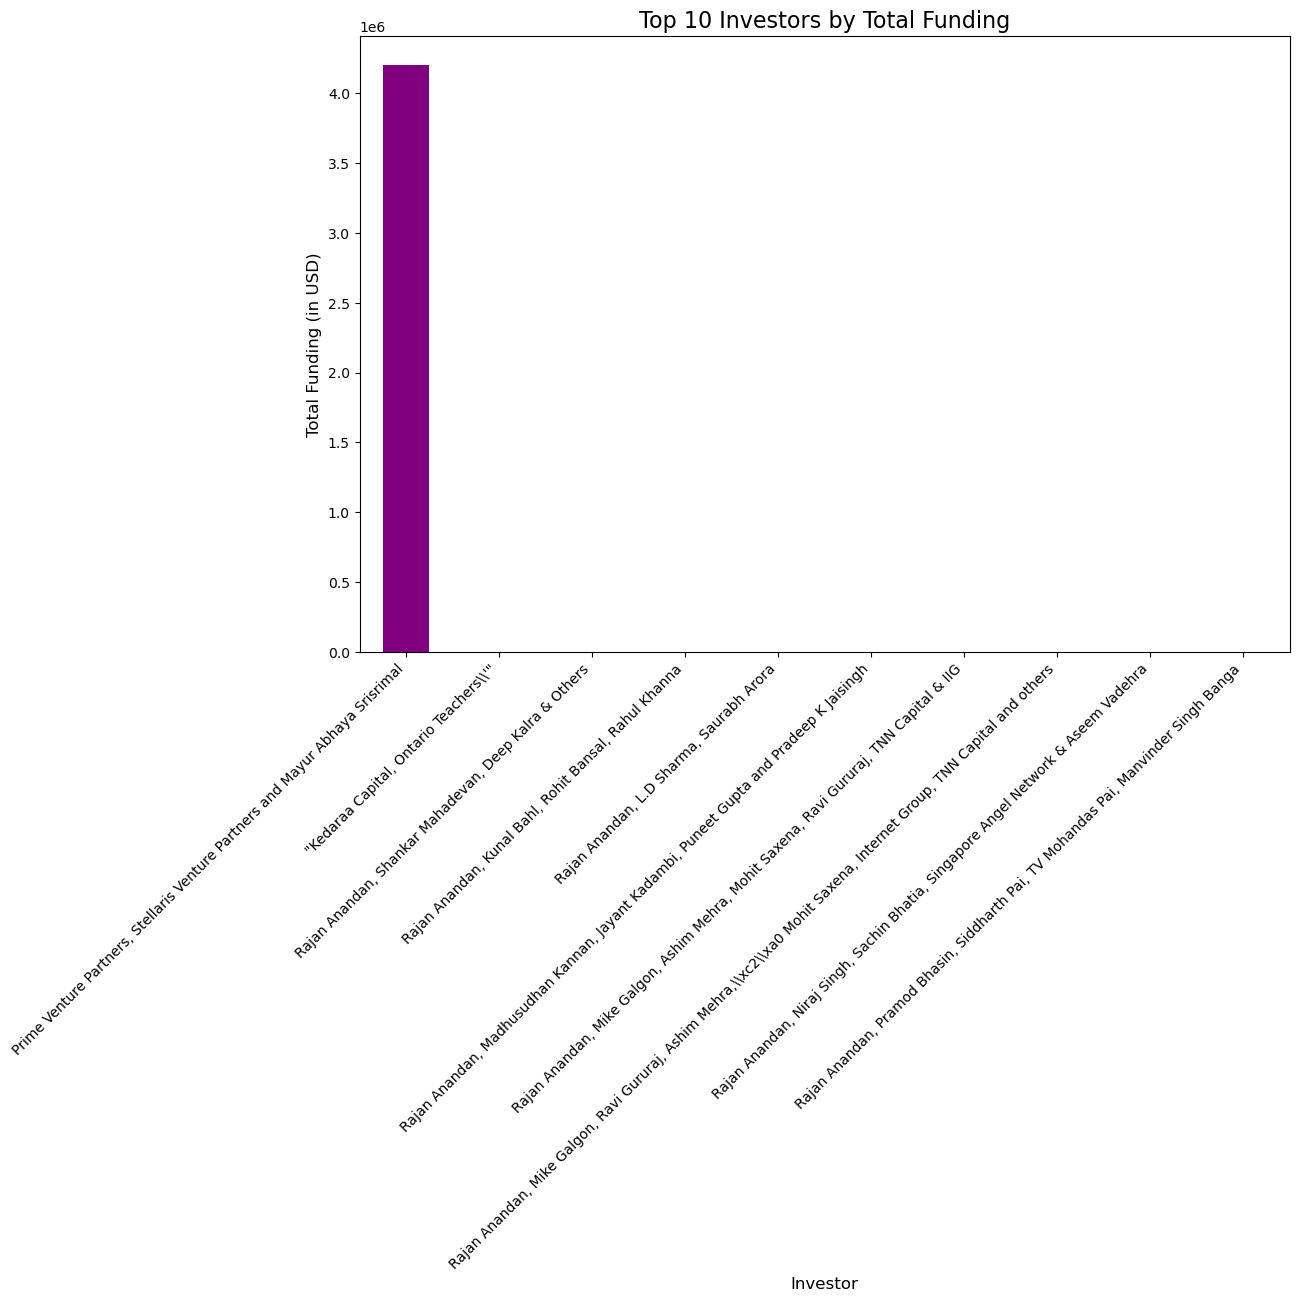

In [21]:
investor_funding = df.groupby('Investors Name')['Amount in USD'].sum().sort_values(ascending=False)
top_10_investors = investor_funding.head(10)
plt.figure(figsize=(12, 8))
top_10_investors.plot(kind='bar', color='purple')
plt.title('Top 10 Investors by Total Funding', fontsize=16)
plt.xlabel('Investor', fontsize=12)
plt.ylabel('Total Funding (in USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1200x800 with 0 Axes>

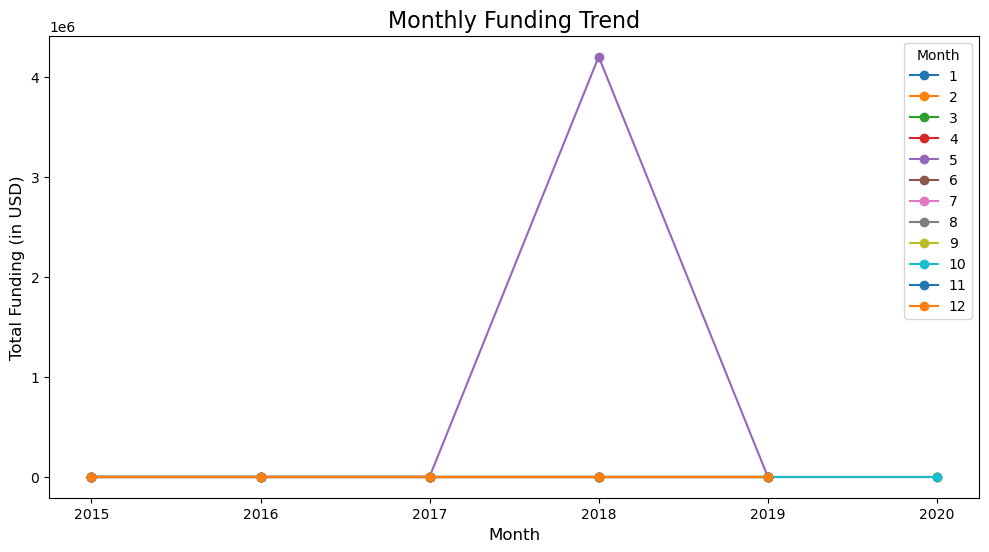

In [22]:
monthly_funding = df.groupby(['Year', 'Month'])['Amount in USD'].sum().unstack()
plt.figure(figsize=(12, 8))
monthly_funding.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Monthly Funding Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Funding (in USD)', fontsize=12)
plt.show()


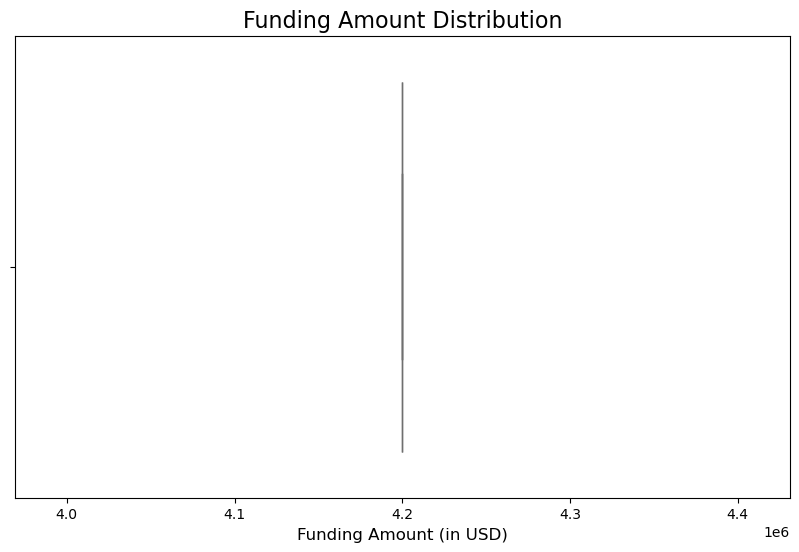

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount in USD'], color='skyblue')
plt.title('Funding Amount Distribution', fontsize=16)
plt.xlabel('Funding Amount (in USD)', fontsize=12)
plt.show()


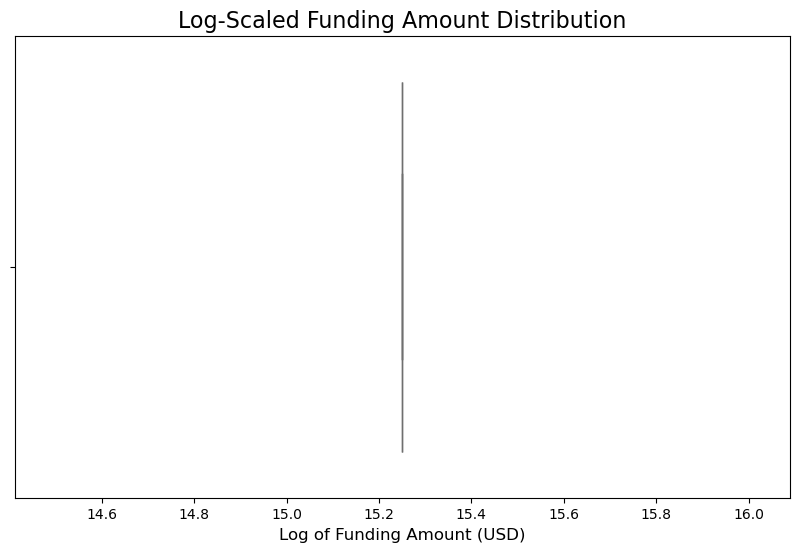

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=np.log1p(df['Amount in USD']), color='skyblue')
plt.title('Log-Scaled Funding Amount Distribution', fontsize=16)
plt.xlabel('Log of Funding Amount (USD)', fontsize=12)
plt.show()


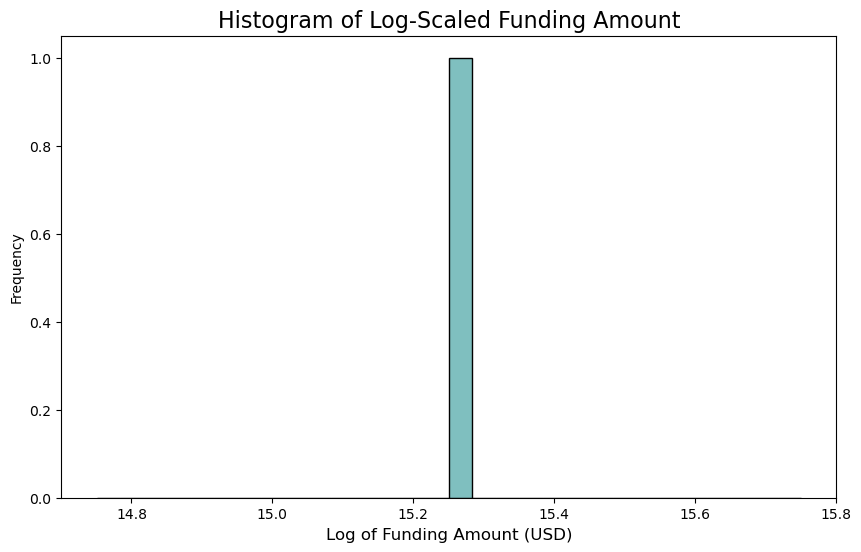

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['Amount in USD']), bins=30, kde=True, color='teal')
plt.title('Histogram of Log-Scaled Funding Amount', fontsize=16)
plt.xlabel('Log of Funding Amount (USD)', fontsize=12)
plt.ylabel('Frequency')
plt.show()


In [26]:
print("Funding amount stats:")
print(df['Amount in USD'].describe())


Funding amount stats:
count          1.0
mean     4200000.0
std            NaN
min      4200000.0
25%      4200000.0
50%      4200000.0
75%      4200000.0
max      4200000.0
Name: Amount in USD, dtype: float64
